In [151]:
# Import Libraries
# Object manipulation
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict

# Plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns

## **Read in Datasets as Dataframes**

In [153]:
# Read the CoffeeShop_Visits.csv file as a dataframe in Pandas library, and name the dataframe as df_visit
df_visit = pd.read_csv("CoffeeShop_Visits.csv")
print(df_visit)


     OrderID               Name Store Visited Date of Visit  Phone number  \
0          1  Mujtaba Whitehead       Orchard       Tuesday      89762334   
1          2       Iris Harrell    Ang Mo Kio        Monday      85461073   
2          3    Destiny Bassett      Tampines      Thursday    6585343662   
3          4     Juliette Hogan        Jurong     Fridayday      82821574   
4          5        Sohaib Read        Jurong      Thursday      87254281   
..       ...                ...           ...           ...           ...   
735      731        Tomos Mckee     Serangoon     Wednesday      84497025   
736      732        Diego Perez      Tampines        Monday    6582648241   
737      733     Tabitha Durham    Ang Mo Kio       Tuesday      82038495   
738      734     Kevin Matthews    Ang Mo Kio      Thursday    6589516206   
739      735       Lynda Galvan       Orchard     Wednesday      95849816   

             Order  Product Rating  Ambience rating  Waiting Time  
0      

In [154]:
# Read the CoffeeShop_Customers.csv file as a dataframe in Pandas library, and name the dataframe as df_customer

df_customer = pd.read_csv("CoffeeShop_Customers.csv")

In [155]:
## Merge 2 dataframes together
## https://datacarpentry.org/python-socialsci/11-joins/index.html

df = pd.merge(df_visit, df_customer, how='left', left_on = 'Name', right_on = 'Name')
df.head(5)

,OrderID,Name,Store Visited,Date of Visit,Phone number,Order,Product Rating,Ambience rating,Waiting Time,Gender,Age,Membership Level
0,1,Mujtaba Whitehead,Orchard,Tuesday,89762334,Cappuccino,2.0,4.0,3.0,Female,15.0,Silver
1,2,Iris Harrell,Ang Mo Kio,Monday,85461073,americana,5.0,5.0,0.0,Female,21.0,Gold
2,3,Destiny Bassett,Tampines,Thursday,6585343662,Cappuccino,5.0,5.0,1.0,Female,42.0,Platinum
3,4,Juliette Hogan,Jurong,Fridayday,82821574,Cappuccino,4.0,3.0,5.0,Female,57.0,Silver
4,5,Sohaib Read,Jurong,Thursday,87254281,Dble Espresso,5.0,1.0,3.0,Male,28.0,Platinum


In [156]:
# Get information of the merged dataset by showing how many rows and columns, and what are the column names
df.info()

print('\nThe dataframe contains', df.shape[0],"rows and",df.shape[1],"columns")
print('The column names are', [df.columns[i] for i in range(df.shape[1])], "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderID           740 non-null    int64  
 1   Name              740 non-null    object 
 2   Store Visited     740 non-null    object 
 3   Date of Visit     735 non-null    object 
 4   Phone number      740 non-null    int64  
 5   Order             740 non-null    object 
 6   Product Rating    738 non-null    float64
 7   Ambience rating   734 non-null    float64
 8   Waiting Time      739 non-null    float64
 9   Gender            739 non-null    object 
 10  Age               739 non-null    float64
 11  Membership Level  739 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 69.5+ KB

The dataframe contains 740 rows and 12 columns
The column names are ['OrderID', 'Name', 'Store Visited', 'Date of Visit', 'Phone number', 'Order', 'Product Rating', 'Ambienc

## **Data Cleaning - Remove Duplicates**

In [158]:
# make a copy of the original dataframe, in case we still need it.
df2 = df.copy()

In [159]:
# Check if there is any duplicate rows. If yes, how many of them
rows_duplicate = df2[df2.duplicated()]
print('There are ', rows_duplicate.shape[0], 'number of duplicate rows')

There are  5 number of duplicate rows


In [160]:
# Remove the duplicate data
df2 = df2.drop_duplicates()
df2.head(5)

,OrderID,Name,Store Visited,Date of Visit,Phone number,Order,Product Rating,Ambience rating,Waiting Time,Gender,Age,Membership Level
0,1,Mujtaba Whitehead,Orchard,Tuesday,89762334,Cappuccino,2.0,4.0,3.0,Female,15.0,Silver
1,2,Iris Harrell,Ang Mo Kio,Monday,85461073,americana,5.0,5.0,0.0,Female,21.0,Gold
2,3,Destiny Bassett,Tampines,Thursday,6585343662,Cappuccino,5.0,5.0,1.0,Female,42.0,Platinum
3,4,Juliette Hogan,Jurong,Fridayday,82821574,Cappuccino,4.0,3.0,5.0,Female,57.0,Silver
4,5,Sohaib Read,Jurong,Thursday,87254281,Dble Espresso,5.0,1.0,3.0,Male,28.0,Platinum


In [161]:
## Show the number of rows and columns after removing duplicate rows
df2.shape
print('The number of rows are', df2.shape[0],' and number of columns are', df2.shape[1],'.')

The number of rows are 735  and number of columns are 12 .


## **Data cleaning - Check Missing Data**

In [163]:
# Check how many missing cells for each column
df.isnull().sum()

OrderID             0
Name                0
Store Visited       0
Date of Visit       5
Phone number        0
Order               0
Product Rating      2
Ambience rating     6
Waiting Time        1
Gender              1
Age                 1
Membership Level    1
dtype: int64

In [164]:
index=df2.isnull().sum()>0
print('The column which contain missing cells are', [df.columns[index][i] for i in range(sum(index))])
print('The total number of missing cells is 17')

The column which contain missing cells are ['Date of Visit', 'Product Rating', 'Ambience rating', 'Waiting Time', 'Gender', 'Age', 'Membership Level']
The total number of missing cells is 17


## **Data cleaning - Missing Data - Approach : drop rows which contain NA values**

In [166]:
# Drop rows containing at least one NA
df_drop_rows_with_na = df2.dropna()

In [167]:
# Check how many rows left after removing the NAs
(df.shape[0] - df_drop_rows_with_na.shape[0]) / df.shape[0]

0.022972972972972974


## **Data Cleaning - Correct wrong data entries**










In [169]:
# Make a copy of the data after removing missing cells
# Display the first 5 rows of the dataset
df3 = df2.copy()
df3.head(5)

,OrderID,Name,Store Visited,Date of Visit,Phone number,Order,Product Rating,Ambience rating,Waiting Time,Gender,Age,Membership Level
0,1,Mujtaba Whitehead,Orchard,Tuesday,89762334,Cappuccino,2.0,4.0,3.0,Female,15.0,Silver
1,2,Iris Harrell,Ang Mo Kio,Monday,85461073,americana,5.0,5.0,0.0,Female,21.0,Gold
2,3,Destiny Bassett,Tampines,Thursday,6585343662,Cappuccino,5.0,5.0,1.0,Female,42.0,Platinum
3,4,Juliette Hogan,Jurong,Fridayday,82821574,Cappuccino,4.0,3.0,5.0,Female,57.0,Silver
4,5,Sohaib Read,Jurong,Thursday,87254281,Dble Espresso,5.0,1.0,3.0,Male,28.0,Platinum


**Wrong data types**

In [171]:
# For the "Age" column, convert the data type to integer instead of float
# Display the first 5 rows of the dataset after conversion of data type
df3['Age'] = df3['Age'].fillna(0).astype(int)
df3.head(5)


,OrderID,Name,Store Visited,Date of Visit,Phone number,Order,Product Rating,Ambience rating,Waiting Time,Gender,Age,Membership Level
0,1,Mujtaba Whitehead,Orchard,Tuesday,89762334,Cappuccino,2.0,4.0,3.0,Female,15,Silver
1,2,Iris Harrell,Ang Mo Kio,Monday,85461073,americana,5.0,5.0,0.0,Female,21,Gold
2,3,Destiny Bassett,Tampines,Thursday,6585343662,Cappuccino,5.0,5.0,1.0,Female,42,Platinum
3,4,Juliette Hogan,Jurong,Fridayday,82821574,Cappuccino,4.0,3.0,5.0,Female,57,Silver
4,5,Sohaib Read,Jurong,Thursday,87254281,Dble Espresso,5.0,1.0,3.0,Male,28,Platinum


**Typo Errors**

In [173]:
# Display the categories in column "Order"
df3['Order'].value_counts()

Order
Tea                189
Cappuccino         183
Americano          139
Caramel Latte       60
Latte               42
Double Espresso     25
americano           11
American            10
tea                  9
latte                8
americana            8
Mocha                7
Cappuchino           7
Cappaccino           5
Dble Espresso        5
Double Expresso      4
Capuccino            3
T                    2
Cappucino            2
DEspresso            2
Late                 2
Moca                 2
Flat white           1
Flat White           1
Latta                1
Clatte               1
Cappccino            1
Caramel Late         1
Espressox2           1
flat white           1
Latt                 1
Caramel Latt         1
Name: count, dtype: int64

In [174]:
# Correct wrong entry in Order for "Tea" by changing "T" and "tea" to "Tea"
df3.loc[(df3['Order']=='T') | (df3['Order']=='tea'), 'Order'] = 'Tea'

In [175]:
# Continue to correct the rest of wrong entries in the "Order" column to make them consistent
df3.loc[(df3['Order']=='flat white') | (df3['Order']=='Flat White'), 'Order'] = 'Flat white'
df3.loc[(df3['Order']=='Cappaccino') | (df3['Order']=='Cappucino') | (df3['Order']=='Cappccino') | (df3['Order']=='Capuccino') | (df3['Order']=='Cappuchino'), 'Order'] = 'Cappuccino'
df3.loc[(df3['Order']=='Double Expresso') | (df3['Order']=='Dble Espresso'), 'Order'] = 'Double Espresso'
df3.loc[(df3['Order']=='American') | (df3['Order']=='americano') | (df3['Order']=='americana'), 'Order'] = 'Americano'
df3.loc[(df3['Order']=='DEspresso') | (df3['Order']=='Espressox2'), 'Order'] = 'Espresso'
df3.loc[(df3['Order']=='Late') | (df3['Order']=='Latta') | (df3['Order']=='Clatte') | (df3['Order']=='Latt') | (df3['Order']=='latte'), 'Order'] = 'Latte'
df3.loc[(df3['Order']=='Caramel Late') | (df3['Order']=='Caramel Latt') | (df3['Order']=='Caramel Latte'), 'Order'] = 'Caramel Latte'
df3.loc[(df3['Order']=='Moca'), 'Order'] = 'Mocha'

df3['Order'].value_counts()

Order
Cappuccino         201
Tea                200
Americano          168
Caramel Latte       62
Latte               55
Double Espresso     34
Mocha                9
Espresso             3
Flat white           3
Name: count, dtype: int64

**Inconsistent Entries**

In [177]:
# For "Phone Number" column, some have 65 in front. Extract only the last 8 digit of the phone number to make data consistent.
# Convert this column to string.
df3[['Phone number']] = df3[['Phone number']].astype('str')

# Extract last few characters of a string in the column
df3['Phone number'] = df3['Phone number'].str[-8:]

df3.head(10)

,OrderID,Name,Store Visited,Date of Visit,Phone number,Order,Product Rating,Ambience rating,Waiting Time,Gender,Age,Membership Level
0,1,Mujtaba Whitehead,Orchard,Tuesday,89762334,Cappuccino,2.0,4.0,3.0,Female,15,Silver
1,2,Iris Harrell,Ang Mo Kio,Monday,85461073,Americano,5.0,5.0,0.0,Female,21,Gold
2,3,Destiny Bassett,Tampines,Thursday,85343662,Cappuccino,5.0,5.0,1.0,Female,42,Platinum
3,4,Juliette Hogan,Jurong,Fridayday,82821574,Cappuccino,4.0,3.0,5.0,Female,57,Silver
4,5,Sohaib Read,Jurong,Thursday,87254281,Double Espresso,5.0,1.0,3.0,Male,28,Platinum
5,6,Earl Whitley,Tampines,Monday,92082124,Cappuccino,4.0,2.0,5.0,Male,52,Platinum
6,7,Sharmin Charlton,Tampines,Thursday,82635819,Americano,1.0,3.0,4.0,Male,17,Gold
7,8,Alejandro Clegg,Tampines,Tuesday,84034198,Cappuccino,NaN,NaN,NaN,Female,49,Platinum
8,9,Beatrix Mccann,Serangoon,Thurs,92047184,Americano,4.0,5.0,3.0,Female,41,Platinum
9,10,Olivia Figueroa,Serangoon,Fridayday,92847590,Americano,4.0,4.0,0.0,Female,54,Platinum


**Any Other Error?**

In [179]:
# Check ALL other columns and see if it is necessary to make any corrections

In [180]:
df3['Ambience rating'] = df3['Ambience rating'].fillna(0).astype(int)
df3['Waiting Time'] = df3['Waiting Time'].fillna(0).astype(int)
df3['Product Rating'] = df3['Product Rating'].fillna(0).astype(int)
df3.loc[(df3['Ambience rating']=='Ambience rating'), 'Ambience rating'] = 'Ambience Rating'

C:\Users\lone7\AppData\Local\Temp\ipykernel_6752\2205679318.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ambience Rating' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



In [181]:
df3.loc[(df3['Date of Visit']=='Mon'), 'Date of Visit'] = 'Monday'
df3.loc[(df3['Date of Visit']=='Tues'), 'Date of Visit'] = 'TuesdQay'
df3.loc[(df3['Date of Visit']=='Fridayday'), 'Date of Visit'] = 'Friday'
df3.loc[(df3['Date of Visit']=='Thurs '), 'Date of Visit'] = 'Thursday'
df3['Date of Visit'].value_counts()

Date of Visit
Thursday     159
Friday       153
Monday       148
Wednesday    133
Tuesday      125
TuesdQay      12
Name: count, dtype: int64

In [182]:
df3.loc[(df['Store Visited']=='AMK'), 'Store Visited'] = 'Ang Mo Kio'
df3['Store Visited'].value_counts()

Store Visited
Ang Mo Kio    157
Serangoon     154
Tampines      149
Jurong        141
Orchard       134
Name: count, dtype: int64

# **Data Exploration**

In [184]:
# Show at least 5 meaingful insights, using charts / text. :
# Which Products are most popular?
# Which gender/age group visits most often?
# Are some shops more popular?
# Does the product type affect the rating / waiting time?
# Is the ambience rating/ waiting time affected by store locations (CBD/Heartland)?

In [185]:
# Which Products are most popular?

In [186]:
df3['Order'].value_counts()

Order
Cappuccino         201
Tea                200
Americano          168
Caramel Latte       62
Latte               55
Double Espresso     34
Mocha                9
Espresso             3
Flat white           3
Name: count, dtype: int64

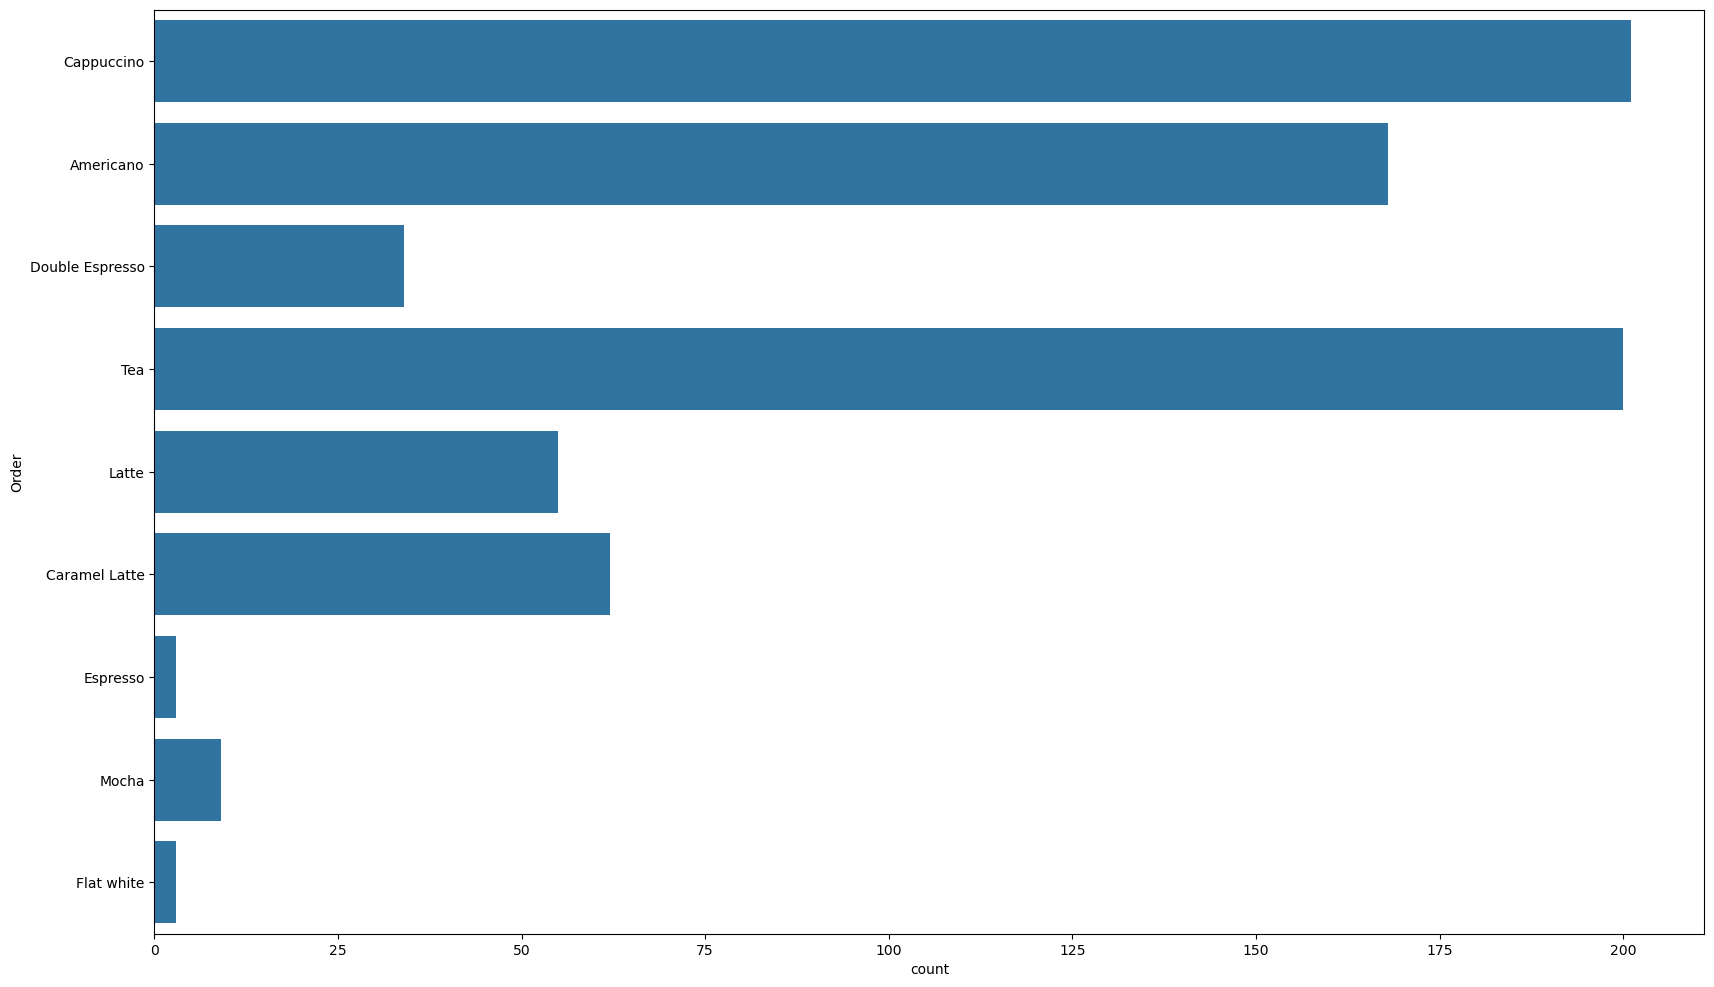

In [187]:
plt.figure(figsize = (20,12))
sns.countplot(data = df3, y = "Order");

In [188]:
counts = df3['Order'].value_counts()*100/sum(df3['Order'].value_counts())
popular_labels = counts.index[:10]   # Top 10
popular_labels
colors = ['lightslategray',] * len(popular_labels)
colors[0] = 'crimson'
fig = go.Figure(data=[go.Bar(
    x=counts[:10],
    y=popular_labels,
    marker_color=colors, # marker color can be a single color value or an iterable
    orientation='h'
)])

fig.update_layout(title_text='Proportion of Order (in %)',
                  xaxis_title="Percentage",
                  yaxis_title="Order")

In [189]:
# Conclusion: Cappuccino is the most popular drink since it has the most number of counts.

In [190]:
# Which gender/age group visits most often?

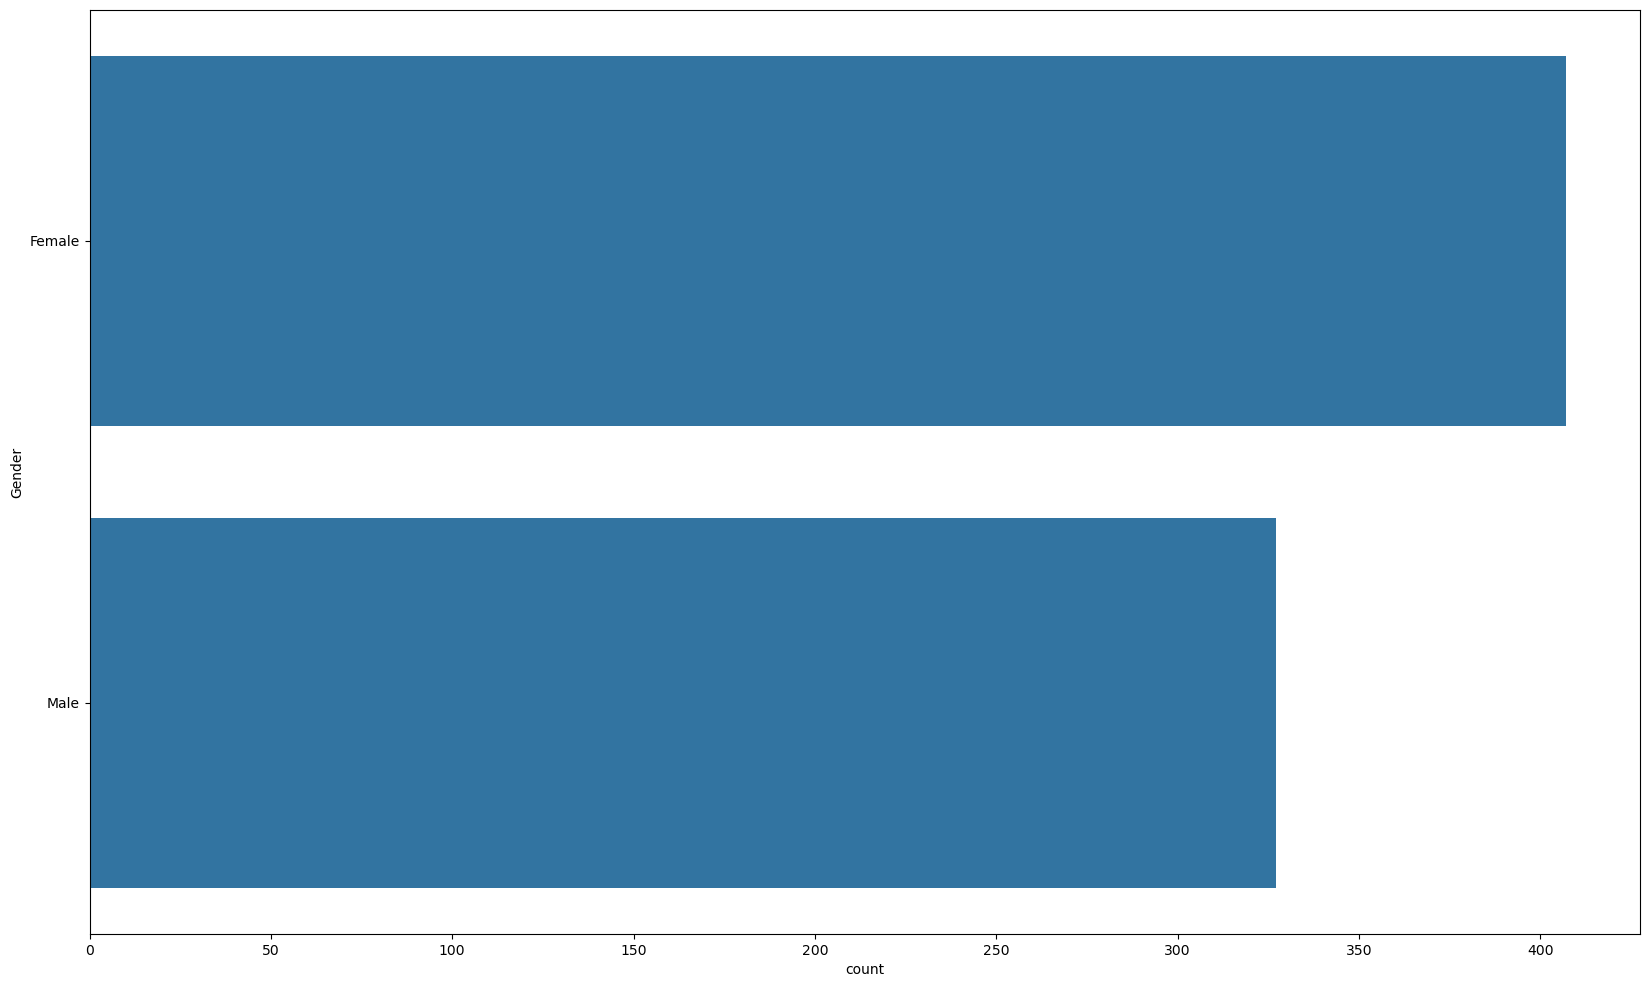

In [191]:
plt.figure(figsize = (20,12))
sns.countplot(data = df3, y = "Gender");

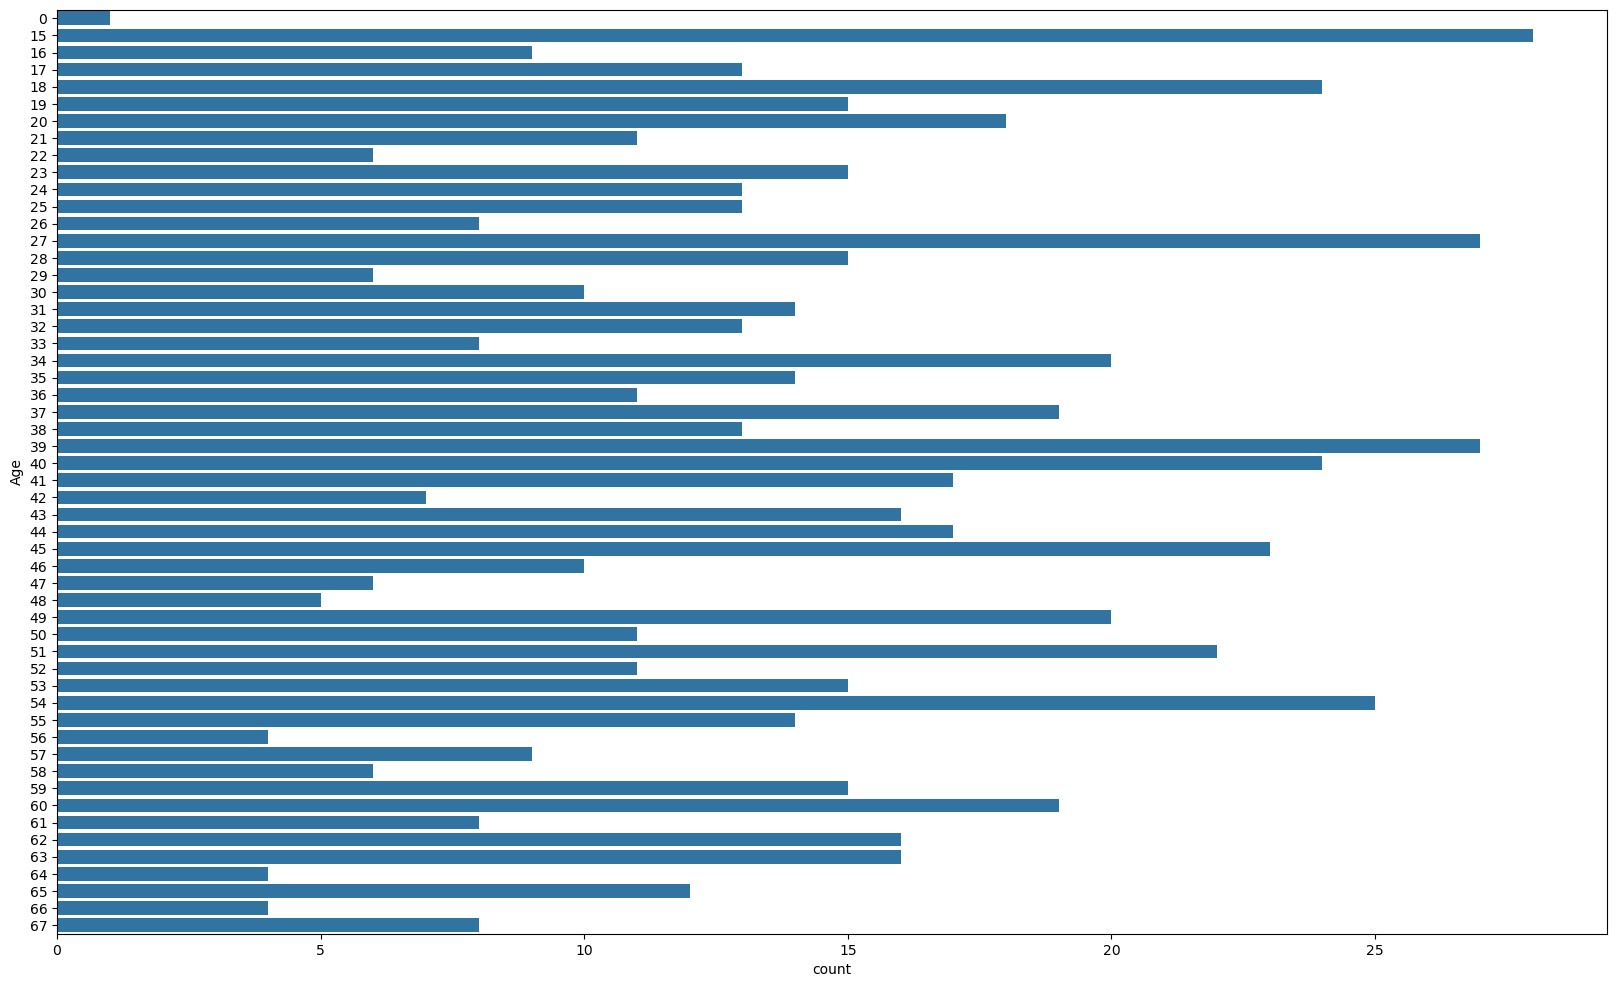

In [192]:
plt.figure(figsize = (20,12))
sns.countplot(data = df3, y = "Age");

In [193]:
# Conclusion: The most number of Gender visit is Female, and the most number of Age group visit is 15.

In [194]:
# Are some shops more popular?

In [195]:
df3['Store Visited'].value_counts()

Store Visited
Ang Mo Kio    157
Serangoon     154
Tampines      149
Jurong        141
Orchard       134
Name: count, dtype: int64

In [196]:
counts = df3['Store Visited'].value_counts()*100/sum(df3['Store Visited'].value_counts())
popular_labels = counts.index[:10]   # Top 10
popular_labels
colors = ['lightslategray',] * len(popular_labels)
colors[0] = 'crimson'
fig = go.Figure(data=[go.Bar(
    x=counts[:10],
    y=popular_labels,
    marker_color=colors, # marker color can be a single color value or an iterable
    orientation='h'
)])

fig.update_layout(title_text='Proportion of Order (in %)',
                  xaxis_title="Percentage",
                  yaxis_title="Store Visited")

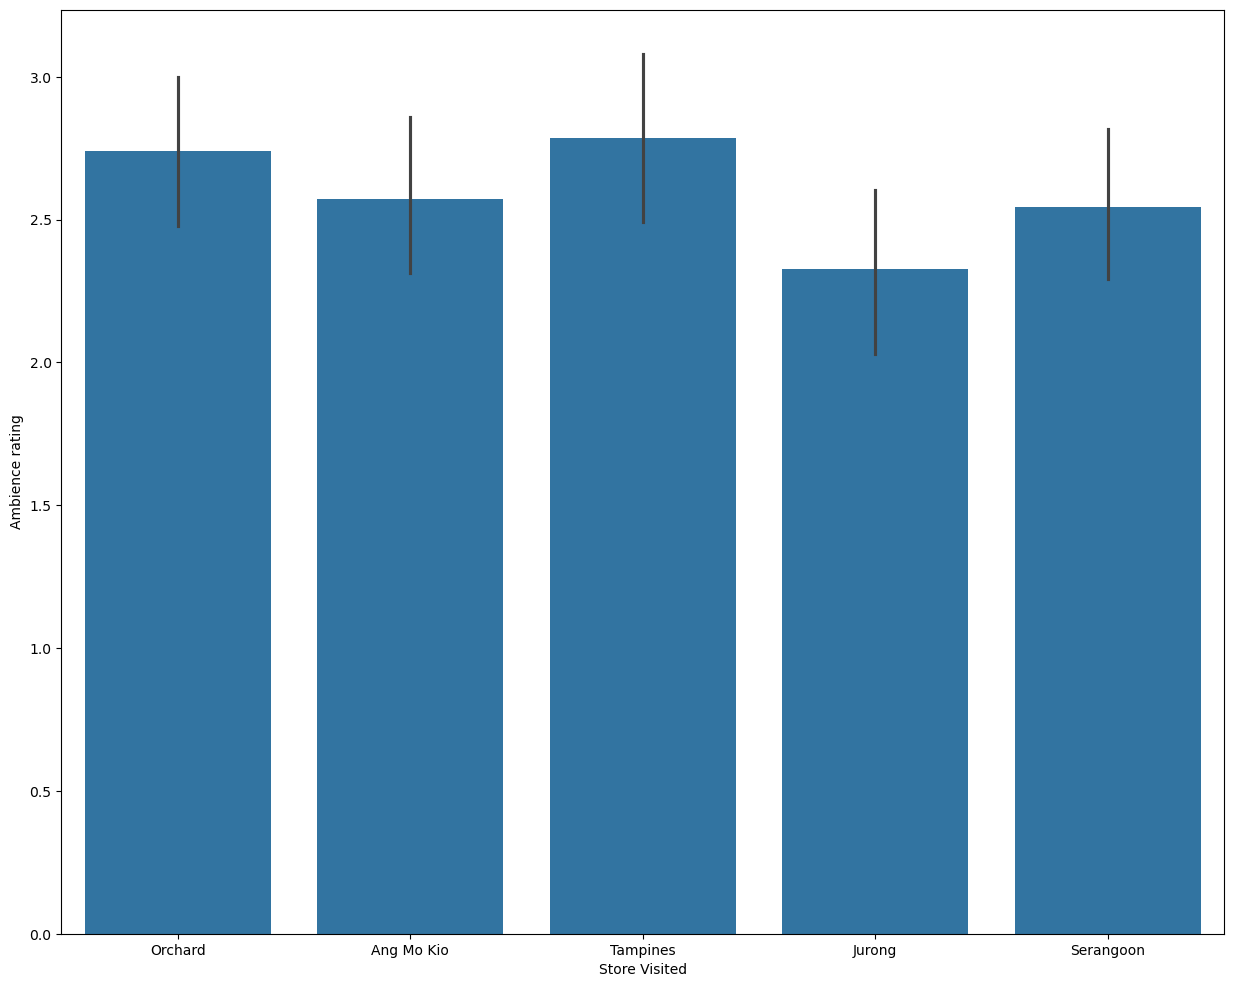

In [197]:
plt.figure(figsize = (15,12))
sns.barplot(data = df3, y = "Ambience rating", x="Store Visited");

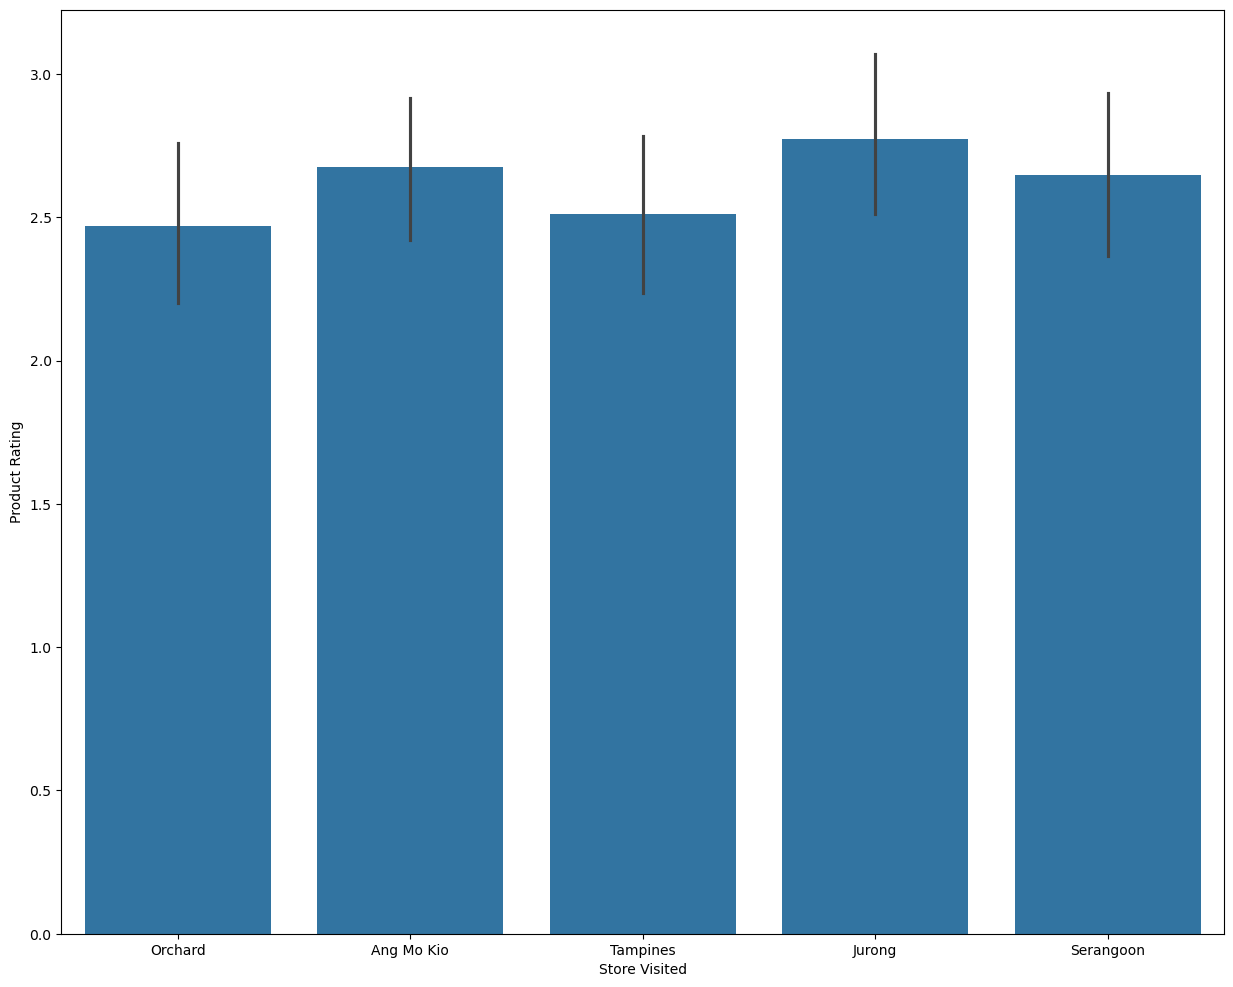

In [198]:
plt.figure(figsize = (15,12))
sns.barplot(data = df3, y = "Product Rating", x="Store Visited");

In [199]:
# Some shops are popular since data above shows Ang Mo Kio being the highest for Stores Visited, 2nd highest in product rating and 3rd highest in ambience rating.

In [200]:
# Does the product type affect the rating / waiting time?

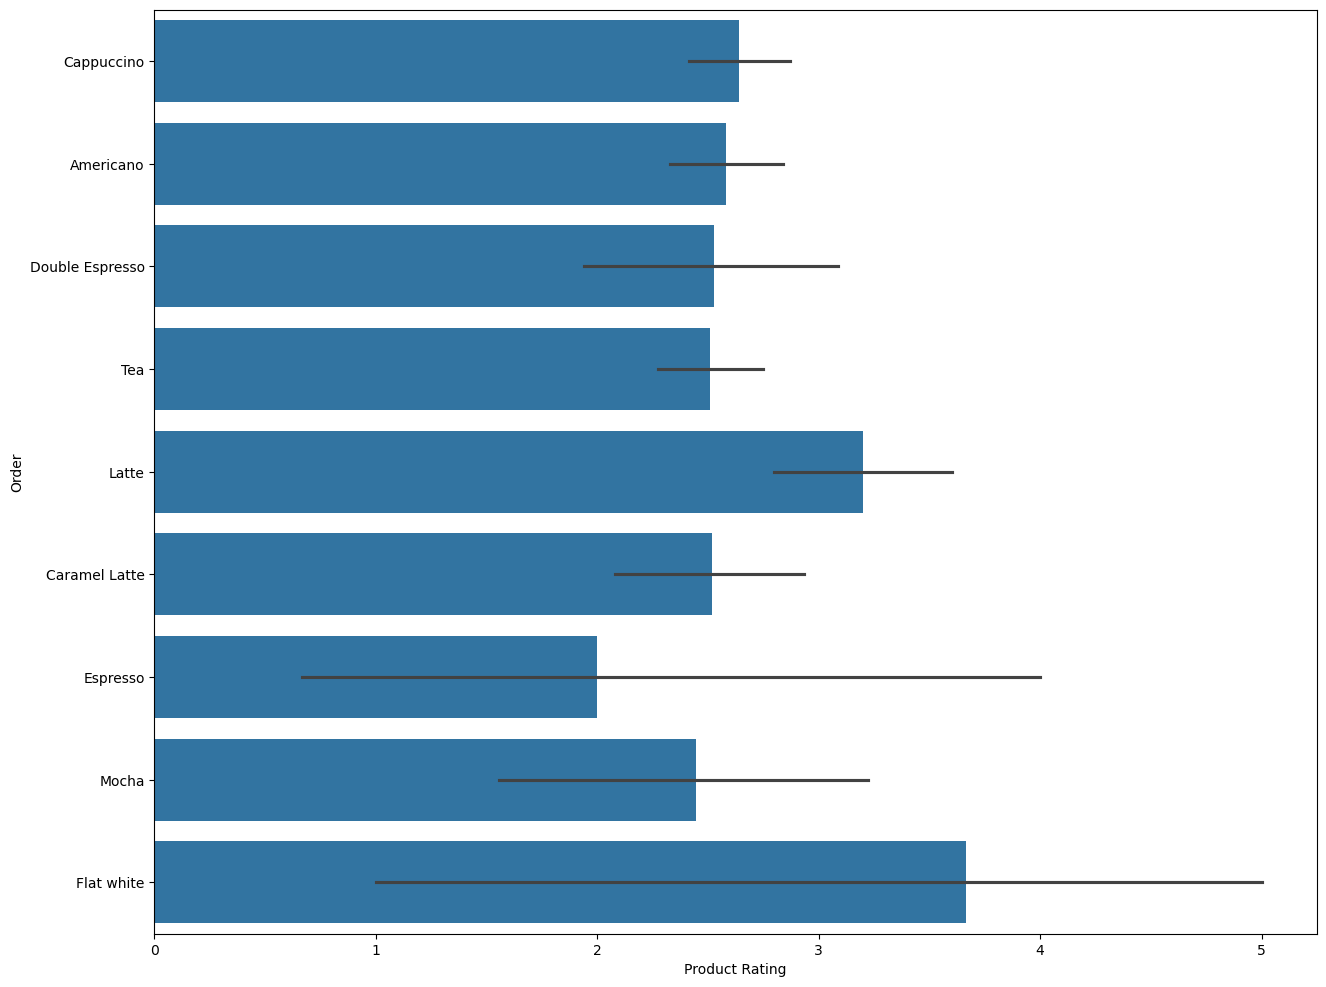

In [201]:
plt.figure(figsize = (15,12))
sns.barplot(data = df3, y = "Order", x="Product Rating");

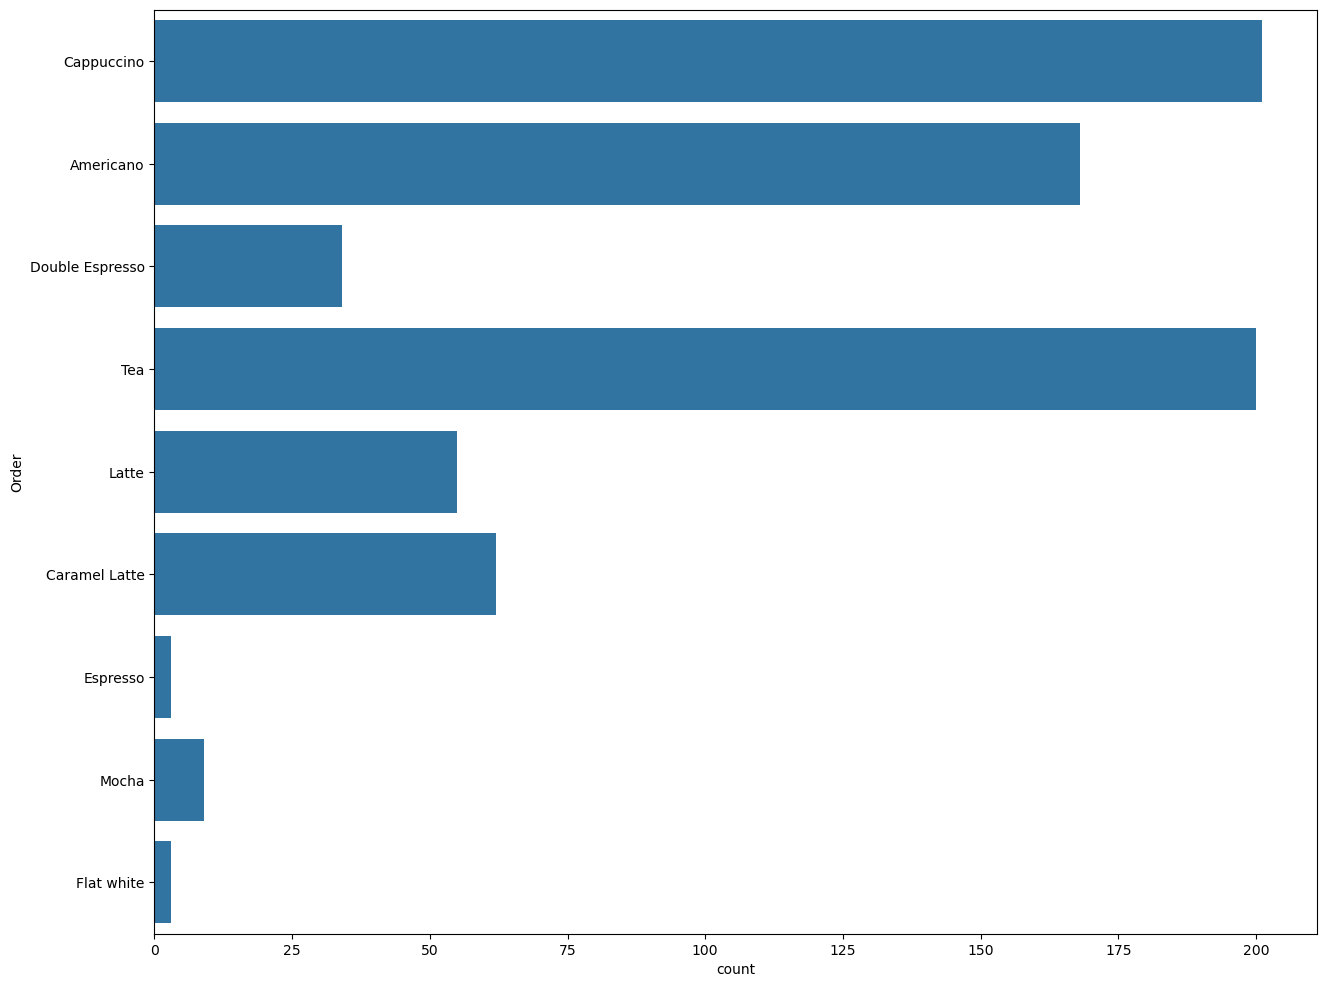

In [202]:
plt.figure(figsize = (15,12))
sns.countplot(data = df3, y='Order');

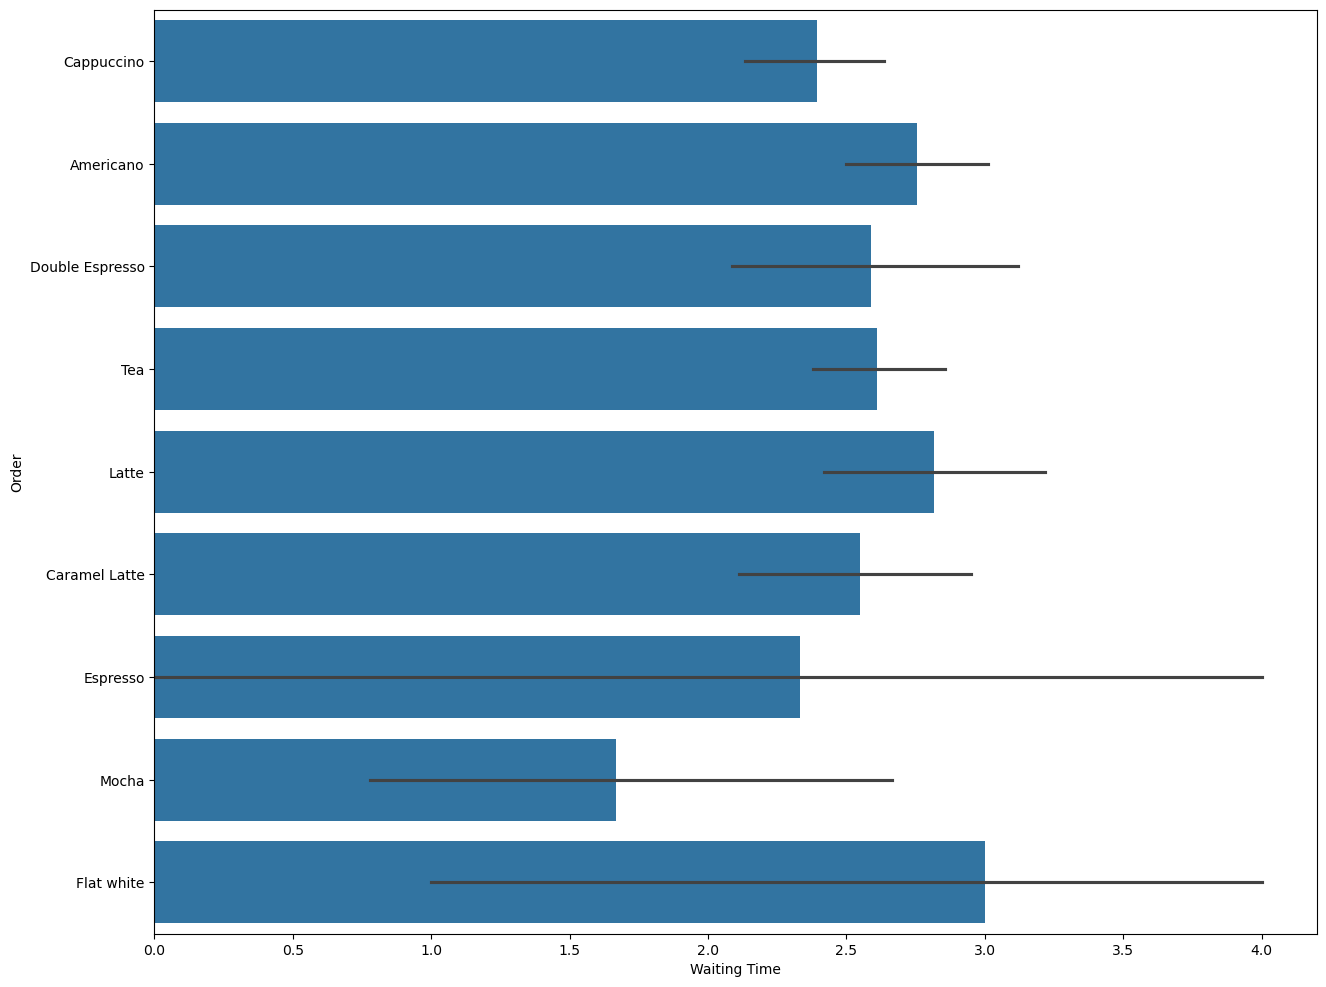

In [203]:
plt.figure(figsize = (15,12))
sns.barplot(data = df3, x='Waiting Time', y="Order");

In [204]:
# Conclusion: The product type does not affect the rating because the Flat white order count is the lowest but it has the highest product rating.
# Moreover, the waiting time as well as order count for Americano is the 3rd highest. However, Flat white waiting time is highest but lowest in order count. Therefore, product type also does not affect waiting time.

In [205]:
# Is the ambience rating/waiting time affected by store locations (CBD/Heartland)?

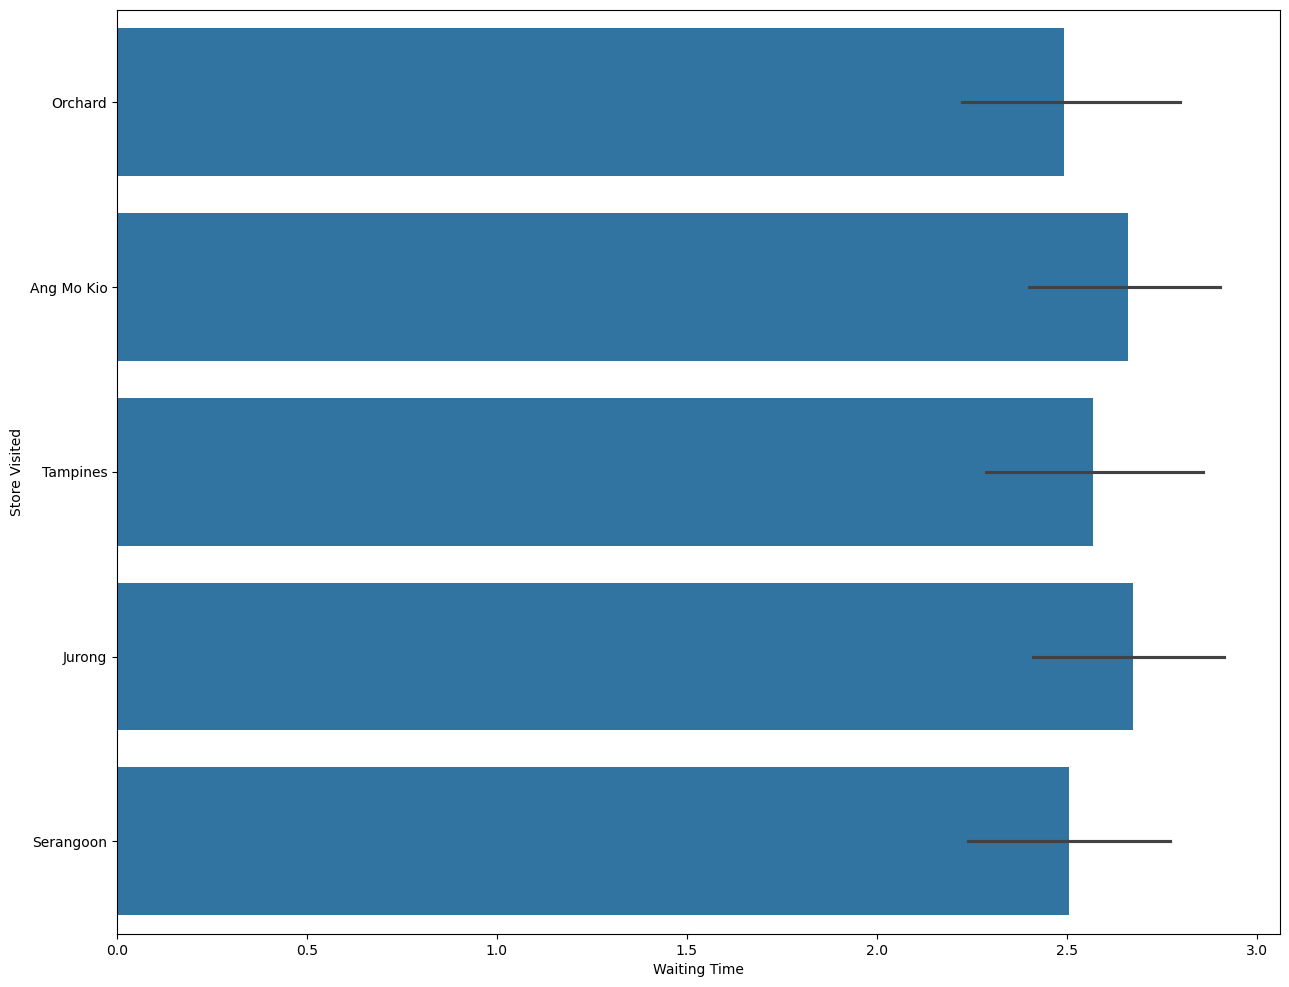

In [206]:
plt.figure(figsize = (15,12))
sns.barplot(data = df3, y='Store Visited', x='Waiting Time');
#Highest store visited is Ang Mo Ko and Jurong.

In [207]:
df3['Waiting Time'].value_counts()

Waiting Time
5    143
3    139
0    124
1    110
2    110
4    109
Name: count, dtype: int64

In [208]:
counts = df3['Waiting Time'].value_counts()*100/sum(df3['Waiting Time'].value_counts())
popular_labels = counts.index[:10]   # Top 10
popular_labels
colors = ['lightslategray',] * len(popular_labels)
colors[0] = 'crimson'
fig = go.Figure(data=[go.Bar(
    x=counts[:10],
    y=popular_labels,
    marker_color=colors, # marker color can be a single color value or an iterable
    orientation='h'
)])

fig.update_layout(title_text='Proportion of Order (in %)',
                  xaxis_title="Percentage",
                  yaxis_title="Waiting Time")

In [209]:
df3['Store Visited'].value_counts()

Store Visited
Ang Mo Kio    157
Serangoon     154
Tampines      149
Jurong        141
Orchard       134
Name: count, dtype: int64

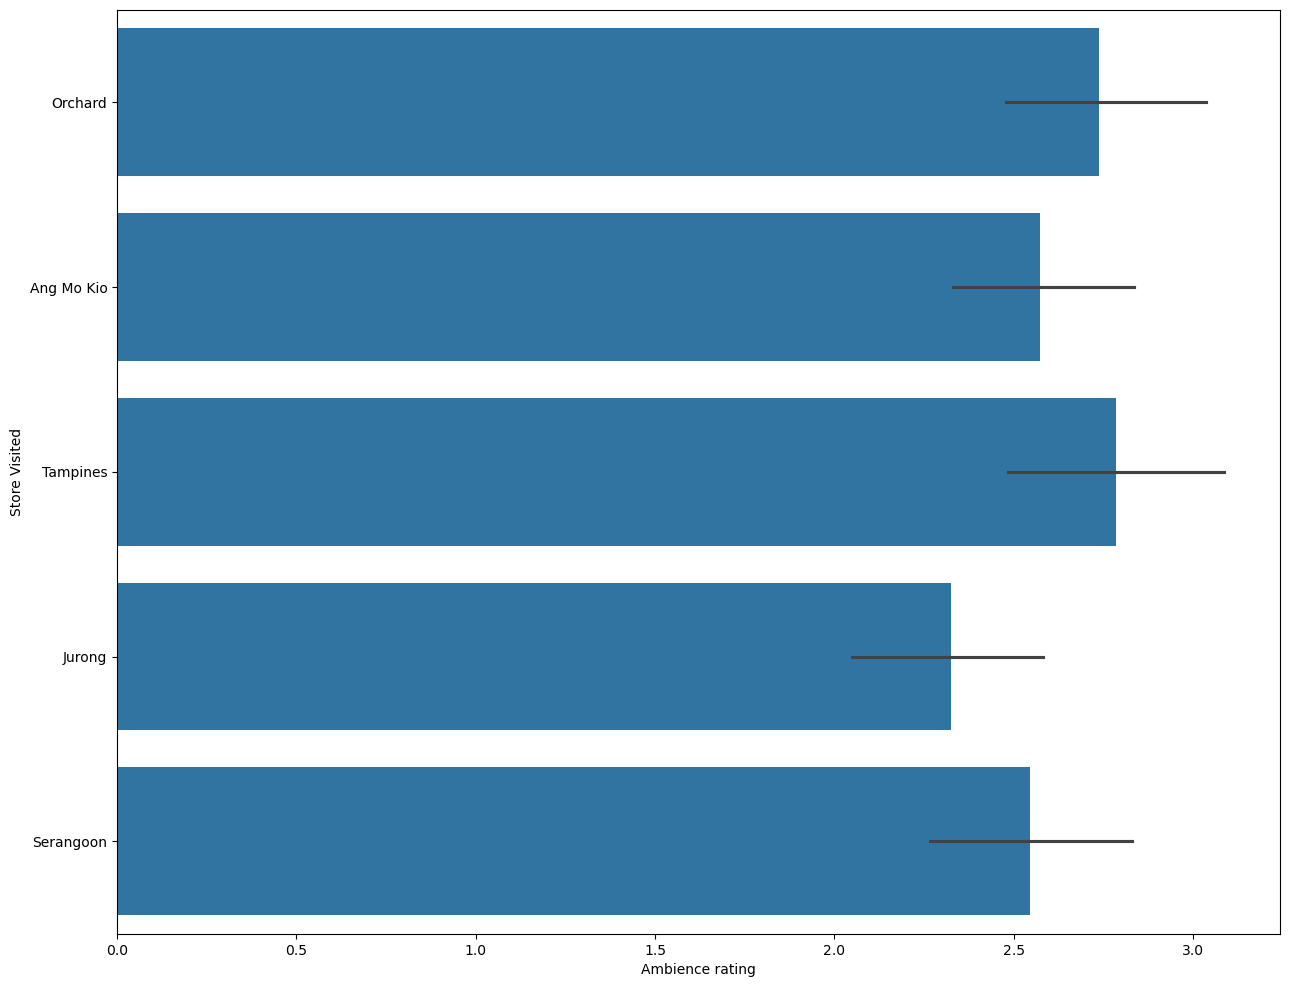

In [210]:
plt.figure(figsize = (15,12))
sns.barplot(data = df3, y='Store Visited', x='Ambience rating');
# Highest ambience rating is Tampines.

In [211]:
# The more people visited in Ang Mo Kio, the higher the waiting time. Therefore, waiting time is affected by Store location.
# However, ambience rating is not affected by store locations as the 2nd highest ambence raitng is Orchard and Orchard has the lowest store visited counts.
# Results showed that the most ordered drink was Cappuccino with 201 orders, accounting for 27.35% of 9 total drinks, and the most visited store was Ang Mo Kio with 257 visits, accounting for 21.4% of 5 total stores.